In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

## Exercise 1
- load the dataset: `../data/international-airline-passengers.csv`
- inspect it using the `.info()` and `.head()` commands
- use the function `pd.to_datetime()` to change the column type of 'Month' to a datatime type
- set the index of df to be a datetime index using the column 'Month' and the `df.set_index()` method
- choose the appropriate plot and display the data
- choose appropriate scale
- label the axes

In [ ]:
# - load the dataset: ../data/international-airline-passengers.csv
df = pd.read_csv('../data/international-airline-passengers.csv')

In [ ]:
# - inspect it using the .info() and .head() commands
df.info()

In [ ]:
df.head()

In [ ]:
# - use the function to_datetime() to change the column type of 'Month' to a datatime type
# - set the index of df to be a datetime index using the column 'Month' and tthe set_index() method

df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

In [ ]:
df.head()

In [ ]:
# - choose the appropriate plot and display the data
# - choose appropriate scale
# - label the axes

df.plot()

## Exercise 2
- load the dataset: `../data/weight-height.csv`
- inspect it
- plot it using a scatter plot with Weight as a function of Height
- plot the male and female populations with 2 different colors on a new scatter plot
- remember to label the axes

In [3]:
# - load the dataset: ../data/weight-height.csv
# - inspect it
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

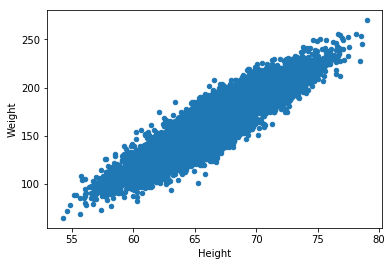

In [7]:
# - plot it using a scatter plot with Weight as a function of Height
_ = df.plot(kind='scatter', x='Height', y='Weight')

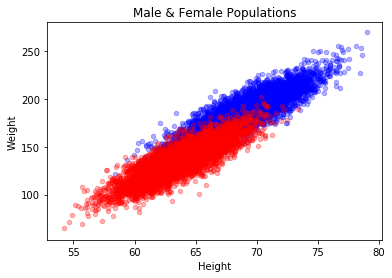

In [8]:
# - plot the male and female populations with 2 different colors on a new scatter plot
# - remember to label the axes

# this can be done in several ways, showing 2 here:
males = df[df['Gender'] == 'Male']
females = df.query('Gender == "Female"')
fig, ax = plt.subplots()

males.plot(kind='scatter', x='Height', y='Weight',
           ax=ax, color='blue', alpha=0.3,
           title='Male & Female Populations')

females.plot(kind='scatter', x='Height', y='Weight',
             ax=ax, color='red', alpha=0.3)

In [9]:
df['Gendercolor'] = df['Gender'].map({'Male': 'blue', 'Female': 'red'})
df.head()

,Gender,Height,Weight,Gendercolor
0,Male,73.847017,241.893563,blue
1,Male,68.781904,162.310473,blue
2,Male,74.110105,212.740856,blue
3,Male,71.730978,220.042470,blue
4,Male,69.881796,206.349801,blue


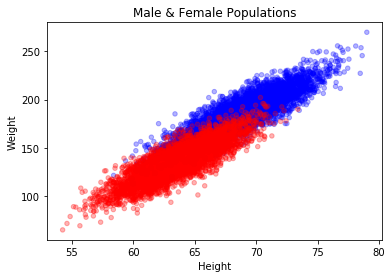

In [10]:
df.plot(kind='scatter', 
        x='Height',
        y='Weight',
        c=df['Gendercolor'],
        alpha=0.3,
        title='Male & Female Populations')

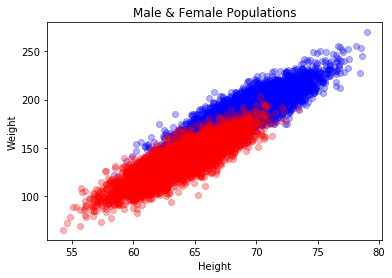

In [11]:
fig, ax = plt.subplots()
ax.plot(males['Height'], males['Weight'], 'ob', 
        females['Height'], females['Weight'], 'or', alpha=0.3)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Male & Female Populations')

## Exercise 3
- plot the histogram of the heights for males and for females on the same plot
- use alpha to control transparency in the plot comand
- plot a vertical line at the mean of each population using `plt.axvline()`

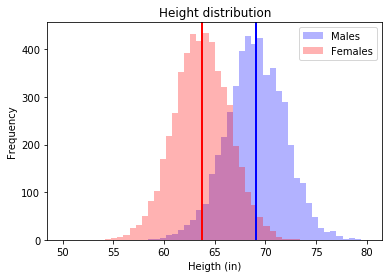

In [12]:
males['Height'].plot(kind='hist',
                     bins=50,
                     range=(50, 80),
                     alpha=0.3,
                     color='blue')

females['Height'].plot(kind='hist',
                       bins=50,
                       range=(50, 80),
                       alpha=0.3,
                       color='red')

plt.title('Height distribution')
plt.legend(["Males", "Females"])
plt.xlabel("Heigth (in)")


plt.axvline(males['Height'].mean(), color='blue', linewidth=2)
plt.axvline(females['Height'].mean(), color='red', linewidth=2)


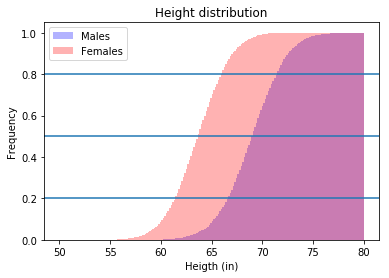

In [14]:
males['Height'].plot(kind='hist',
                     bins=200,
                     range=(50, 80),
                     alpha=0.3,
                     color='blue',
                     cumulative=True,
                     normed=True)

females['Height'].plot(kind='hist',
                       bins=200,
                       range=(50, 80),
                       alpha=0.3,
                       color='red',
                       cumulative=True,
                       normed=True)

plt.title('Height distribution')
plt.legend(["Males", "Females"])
plt.xlabel("Heigth (in)")

plt.axhline(0.8)
plt.axhline(0.5)
plt.axhline(0.2)

## Exercise 4
- plot the weights of the males and females using a box plot
- which one is easier to read?
- (remember to put in titles, axes and legends)

In [15]:
dfpvt = df.pivot(columns = 'Gender', values = 'Weight')

In [16]:
dfpvt.head()

Gender,Female,Male
0,NaN,241.893563
1,NaN,162.310473
2,NaN,212.740856
3,NaN,220.042470
4,NaN,206.349801


In [17]:
dfpvt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Female    5000 non-null float64
Male      5000 non-null float64
dtypes: float64(2)
memory usage: 234.4 KB


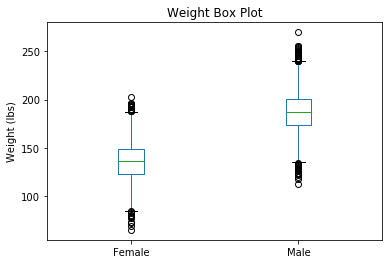

In [18]:
dfpvt.plot(kind='box')
plt.title('Weight Box Plot')
plt.ylabel("Weight (lbs)")

## Exercise 5
- load the dataset: `../data/titanic-train.csv`
- learn about scattermatrix here: http://pandas.pydata.org/pandas-docs/stable/visualization.html
- display the data using a scattermatrix

In [ ]:
df = pd.read_csv('../data/titanic-train.csv')
df.head()

In [ ]:
from pandas.tools.plotting import scatter_matrix

In [ ]:
_ = scatter_matrix(df.drop('PassengerId', axis=1), figsize=(10, 10))